## Построение модели предсказания отказа от брони для сети отелей «Как в гостях»

### Описание проекта

Заказчик этого исследования — сеть отелей «Как в гостях».

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.

Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

### Бизнес-метрика и другие данные

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца.

В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня.

Стоимость номеров отеля:

- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.

Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.

На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

### Описание данных

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:

- id — номер записи;
- adults — количество взрослых постояльцев;
- arrival_date_year — год заезда;
- arrival_date_month — месяц заезда;
- arrival_date_week_number — неделя заезда;
- arrival_date_day_of_month — день заезда;
- babies — количество младенцев;
- booking_changes — количество изменений параметров заказа;
- children — количество детей от 3 до 14 лет;
- country — гражданство постояльца;
- customer_type — тип заказчика:
    - Contract — договор с юридическим лицом;
    - Group — групповой заезд;
    - Transient — не связано с договором или групповым заездом;
    - Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- days_in_waiting_list — сколько дней заказ ожидал подтверждения;
- distribution_channel — канал дистрибуции заказа;
- is_canceled — отмена заказа;
- is_repeated_guest — признак того, что гость бронирует номер второй раз;
- lead_time — количество дней между датой бронирования и датой прибытия;
- meal — опции заказа:
    - SC — нет дополнительных опций;
    - BB — включён завтрак;
    - HB — включён завтрак и обед;
    - FB — включён завтрак, обед и ужин.
- previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
- previous_cancellations — количество отменённых заказов у клиента;
- required_car_parking_spaces — необходимость места для автомобиля;
- reserved_room_type — тип забронированной комнаты;
- stays_in_weekend_nights — количество ночей в выходные дни;
- stays_in_week_nights — количество ночей в будние дни;
- total_nights — общее количество ночей;
- total_of_special_requests — количество специальных отметок.

<a id="Задачи_исследования"></a>

### Задачи исследования

- #### [Этап 1. Разведочный анализ данных (EDA):](#Этап_1)

    - [Подключение библиотек;](#1.1)

    - [Загрузка данных из файла;](#1.2)

    - [Первичный осмотр данных;](#1.3)

    - [Заключение.](#1.4)

- #### [Этап 2. Вычислим бизнес-метрику:](#Этап_2)

    - [Оценим прибыль отеля без внедрения депозитов.](#2.1)

- #### [Этап 3. Подготовим данные к обучению:](#Этап_3)

    - [Проведем кодирование категориальных переменных для моделирования;](#3.1)

    - [Исследуем мультиколлинеарность;](#3.2)

    - [Разделим исходные данные на обучающую и тестовую выборку](#3.3)

- #### [Этап 4. Исследуем качество разных моделей, меняя гиперпараметры:](#Этап_4)

    - [Логистическая регрессия (Logistic Regression);](#Logistic_Regression)
    - [Решающие деревья (Decision Trees);](#Decision_Trees)
    - [Случайный лес (Random Forest);](#Random_Forest)
    - [Градиентный бустинг (Gradient Boosting);](#Gradient_Boosting)
    - [Последовательная модель (Sequential);](#Sequential)

    - [Оценим прибыль, которую принесёт выбранная модель за год.](4.1)

- #### [Этап 5. Выявим признаки «ненадёжного» клиента](#Этап_5)

- #### [Этап 6. Общий вывод](#Этап_6)

<a id="Этап_1"></a>
<a id="1.1"></a>

### Этап 1: Разведочный анализ данных (EDA)
#### Подключение библиотек

[Вернуться к задачам исследования](#Задачи_исследования)

In [ ]:
%pip install tensorflow-addons
%pip install scikeras

In [ ]:
import time
import logging

import tensorflow as tf                                        # Импорт основной библиотеки TensorFlow для создания и обучения машинных моделей, включая нейронные сети
import tensorflow_addons as tfa                                # Импорт дополнительных компонентов (add-ons) для TensorFlow, которые предоставляют расширенные функциональности и слои


from tensorflow.keras import layers, models, optimizers        # TensorFlow-специфичные классы и функции для создания и оптимизации нейронных сетей
from keras.models import Sequential                            # Импорт класса для создания последовательной модели в Keras
from keras.layers import Dense, Dropout                        # Импорт слоёв для нейронных сетей: полносвязный (Dense) и регуляризационный (Dropout)
from keras.callbacks import Callback                           # Импорт класса Callback для создания пользовательских колбеков в процессе обучения модели
from functools import partial                                  # Импорт функции для создания частично применённых функций, упрощает работу с функциями
from scikeras.wrappers import KerasClassifier                  # Импорт класса для интеграции моделей Keras с интерфейсом scikit-learn
import joblib


import pandas as pd                                            # Библиотека для работы с данными, предоставляет функции и структуры данных, такие как DataFrame и Series.
import numpy as np                                             # Фундаментальная библиотека для научных вычислений с поддержкой многомерных массивов и матриц.
import warnings                                                # Модуль для управления предупреждениями.
import random                                                  # Импорт модуля для генерации случайных чисел

import statsmodels.api as sm                                                # statsmodels.api используется для оценки статистических моделей
from statsmodels.stats.outliers_influence import variance_inflation_factor  # variance_inflation_factor из statsmodels используется для определения мультиколлинеарности

# Модули для работы с машинным обучением
from sklearn.model_selection import train_test_split           # Инструмент библиотеки sklearn для разделения исходных данных на обучающую, валидационную и тестовую выборку.

# Модели машинного обучения
from sklearn.linear_model    import LogisticRegression         # Модель логистической регрессии.
from sklearn.tree            import DecisionTreeClassifier     # Модель дерева решений.
from sklearn.ensemble        import RandomForestClassifier     # Модель случайного леса.
from sklearn.ensemble        import GradientBoostingClassifier # Модель градиентного бустинга.
from sklearn.dummy           import DummyClassifier            # Базовые модели для проверки на вменяемость.

# Инструменты для оценки моделей и метрики
from sklearn.model_selection import learning_curve             # Инструмент для построения кривых обучения.
from sklearn.model_selection import GridSearchCV               # Инструмент для выполнения поиска по сетке параметров модели.
from sklearn.metrics         import accuracy_score             # Метрика - точность классификации.
from sklearn.metrics         import confusion_matrix           # Метрика - матрица неточностей.
from sklearn.metrics         import roc_curve, roc_auc_score   # Метрики - ROC-кривая и ROC AUC Score.
from sklearn.metrics         import f1_score                   # Метрика - F1 Score.
from sklearn.preprocessing   import StandardScaler             # Инструмент для маштабирования данны.
from sklearn.preprocessing   import LabelEncoder
from sklearn.preprocessing   import OneHotEncoder
from sklearn.compose         import ColumnTransformer


from imblearn.pipeline import Pipeline
from imblearn.over_sampling  import SMOTE                      # Инструмент для баллансировки классов
from imblearn.over_sampling  import ADASYN                     # Инструмент для баллансировки классов

# Визуализация данных
import matplotlib.pyplot as plt                                # Библиотека для визуализации данных.
import seaborn as sns                                          # Библиотека для красивой визуализации статистических данных.

# Настрйоки отображения
# Устанавливаем формат отображения чисел с двумя знаками после запятой
pd.options.display.float_format = '{:.2f}'.format

# Устанавливает фильтр предупреждений
warnings.filterwarnings("ignore")

logging.basicConfig(filename='model_training.log', level=logging.INFO)

random_state = random.seed(42)

In [4]:
def plot_categorical_features(df, categorical_features):
    """
    Функция для визуализации доли клиентов по различным категориальным признакам.

    Параметры:
    - df (DataFrame): датафрейм с данными
    - categorical_features (list): список категориальных признаков для анализа

    Графики строятся с переводом названий признаков на русский язык.
    Для признака 'country' визуализируются только топ-10 стран.
    """

    sns.set(style="whitegrid")

    # Словарь для перевода названий признаков на русский язык
    feature_translation = {
        'country': 'Страна',
        'customer_type': 'Тип заказчика',
        'meal': 'Тип питания',
        'reserved_room_type': 'Тип номера'
    }

    # Визуализация
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()

    for i, feature in enumerate(categorical_features):
        ax = axes[i]
        translated_feature = feature_translation.get(feature, feature)

        # Топ-10 стран
        if feature == 'country':
            data = df[feature].value_counts(normalize=True).reset_index().head(10)
        else:
            data = df[feature].value_counts(normalize=True).reset_index()

        data.columns = [translated_feature, 'Пропорция']

        sns.barplot(x='Пропорция', y=translated_feature, data=data, ax=ax)
        ax.set_title('Доля клиентов')
        ax.set_xlabel('Пропорция')
        ax.set_ylabel(translated_feature)

    plt.tight_layout()
    plt.show()

def plot_cancellation_ratio(df, features_to_visualize):
    """
    Функция для визуализации соотношения ушедших и неушедших клиентов по различным признакам.

    Параметры:
    - df (DataFrame): датафрейм с данными
    - features_to_visualize (list): список признаков для анализа соотношения отмены бронирования

    Графики строятся с переводом названий признаков и осей на русский язык.
    """

    # Словарь для перевода названий признаков на русский язык
    feature_translation = {
        'customer_type': 'Тип заказчика',
        'meal': 'Тип питания',
        'reserved_room_type': 'Тип номера',
        'is_repeated_guest': 'Повторное бронирование'
    }

    # Визуализация
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()

    for i, feature in enumerate(features_to_visualize):
        ax = axes[i]
        translated_feature = feature_translation.get(feature, feature)

        sns.countplot(x=translated_feature, hue='Отменено', data=df.rename(columns={feature: translated_feature, 'is_canceled': 'Отменено'}), ax=ax)
        ax.set_title(f'Соотношение отмены по {translated_feature}')
        ax.set_xlabel(translated_feature)
        ax.set_ylabel('Количество')

    plt.tight_layout()
    plt.show()

def plot_boxplots_by_cancellation(df, numerical_features):
    """
    Функция для визуализации диаграмм размаха по численным признакам и статусу отмены бронирования.

    Параметры:
    - df (DataFrame): датафрейм с данными
    - numerical_features (list): список численных признаков для анализа

    Графики строятся с переводом названий признаков и осей на русский язык.
    """

    # Словарь для перевода названий признаков на русский язык
    feature_translation = {
        'lead_time': 'Время до заезда',
        'stays_in_weekend_nights': 'Ночи на выходных',
        'stays_in_week_nights': 'Ночи в будни',
        'adults': 'Взрослые'
    }

    # Визуализация
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
    axes = axes.flatten()

    for i, feature in enumerate(numerical_features):
        ax = axes[i]
        translated_feature = feature_translation.get(feature, feature)

        sns.boxplot(x='Отменено', y=translated_feature, data=df.rename(columns={feature: translated_feature, 'is_canceled': 'Отменено'}), ax=ax)
        ax.set_title(f'Диаграмма размаха {translated_feature} по статусу отмены')
        ax.set_xlabel('Статус отмены')
        ax.set_ylabel(translated_feature)

    plt.tight_layout()
    plt.show()

def calculate_profit(df):
    """
    Рассчитывает прибыль отеля на основе данных о бронировании комнат.

    Аргументы:
    df (DataFrame): DataFrame с данными о бронированиях комнат.

    Возвращает:
    df (DataFrame): Исходный DataFrame с добавленным столбцом 'total_profit', содержащим прибыль за каждое бронирование.
    total_profit (float): Общая прибыль отеля за определенный период.

    Примечания:
    - Данные о бронировании должны содержать следующие столбцы: 'is_canceled', 'arrival_date_month', 'reserved_room_type', 'total_nights'.
    - Функция использует статические значения для стоимости комнат и обслуживания (room_dict) и коэффициенты по сезону (month_dict).
    """

    # Создаем отдельный DataFrame с нужными признаками
    df_for_profit = df[['is_canceled', 'arrival_date_month', 'reserved_room_type', 'total_nights']]

    # Добавляем к получившейся таблице значения стоимости комнат и обслуживания
    room_dict = pd.DataFrame({'reserved_room_type' : [i for i in sorted(df_for_profit.reserved_room_type.unique())],
                             'price_per_night' : [1000, 800, 600, 550, 500, 450, 350],
                             'service_price' : [400, 350, 350, 150, 150, 150, 150]})
    df_for_profit = df_for_profit.merge(room_dict, on='reserved_room_type', how='left')

    # Добавляем коэффициенты по сезону
    month_dict = pd.DataFrame({'arrival_date_month' : [i for i in df_for_profit.arrival_date_month.unique()],
                              'koeff' : [1, 1, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4]})
    df_for_profit = df_for_profit.merge(month_dict, on='arrival_date_month', how='left')

    # Создаем функцию для рассчета прибыли и убытка в зависимости от отмены брони
    def profit(data):
        """
        Рассчитывает прибыль или убыток от отдельной бронированной комнаты на основе данных о бронировании.

        Аргументы:
        data (Series): Серия данных с информацией о бронированной комнате, включая следующие поля:
            - 'is_canceled' (int): Флаг отмены бронирования (0 - не отменено, 1 - отменено).
            - 'price_per_night' (float): Стоимость ночи проживания в комнате.
            - 'koeff' (float): Коэффициент, зависящий от месяца прибытия.
            - 'total_nights' (int): Общее количество ночей проживания.

        Возвращает:
        profit (float): Прибыль (если положительная) или убыток (если отрицательный) от бронирования комнаты.

        Примечания:
        - Если бронирование не было отменено ('is_canceled' == 0), то прибыль рассчитывается как:
            income = data['price_per_night'] * data['koeff'] * data['total_nights']
            expenses = data['service_price'] * (1 + data['total_nights'] // 2)
            profit = income - expenses
        - Если бронирование было отменено ('is_canceled' == 1), то прибыль равна 0, а расходы рассчитываются как:
            expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
            profit = -expenses
        """
        if data['is_canceled'] == 0:
            income = data['price_per_night'] * data['koeff'] * data['total_nights']
            expenses = data['service_price'] * (1 + data['total_nights'] // 2)
        else:
            income = 0
            expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
        profit = income - expenses
        return profit


    # Применяем функцию к DataFrame и добавляем столбец 'total_profit'
    df_for_profit['total_profit'] = df_for_profit.apply(profit, axis=1)

    # Рассчитываем общую прибыль за определенный период
    profit_without_deposite = df_for_profit['total_profit'].sum()

    return df_for_profit, profit_without_deposite

def preprocess_data(df, fit_encoders=False, label_encoder=None, onehot_encoder=None):
    """
    Предварительная обработка заданного DataFrame. Создание новой колонки 'total_nights',
    удаление коррелирующих колонок, выполнение one-hot кодирования и label кодирования
    колонки 'arrival_date_month'.

    Параметры:
        df (DataFrame): Исходный DataFrame для предварительной обработки.
        fit_encoders (bool): Флаг, указывающий, нужно ли обучать кодировщики.
        label_encoder (LabelEncoder): Предварительно обученный LabelEncoder.
        onehot_encoder (OneHotEncoder): Предварительно обученный OneHotEncoder.

    Возвращает:
        DataFrame: DataFrame после предварительной обработки.
        LabelEncoder: Обученный LabelEncoder.
        OneHotEncoder: Обученный OneHotEncoder.
    """

    # Создаем переменную total_nights как сумму двух других переменных
    df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

    # Удаляем исходные переменные, чтобы избежать мультиколлинеарности
    df.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis=1, inplace=True)

    # Label кодирование для переменной 'arrival_date_month'
    if fit_encoders:
        label_encoder = LabelEncoder()
        label_encoder.fit(df['arrival_date_month'])

    df['arrival_date_month'] = label_encoder.transform(df['arrival_date_month'])

    # One-hot кодирование
    if fit_encoders:
        onehot_encoder = OneHotEncoder(drop='first', sparse=False)
        onehot_encoder.fit(df[['meal', 'distribution_channel', 'reserved_room_type', 'customer_type']])

    onehot_columns = ['meal', 'distribution_channel', 'reserved_room_type', 'customer_type']
    transformed_data = onehot_encoder.transform(df[onehot_columns])

    # Получение имен колонок после one-hot кодирования
    onehot_feature_names = onehot_encoder.get_feature_names_out(onehot_columns)

    # Добавление результатов one-hot кодирования в DataFrame
    df_onehot = pd.DataFrame(transformed_data, columns=onehot_feature_names, index=df.index)
    df.drop(onehot_columns, axis=1, inplace=True)
    df = pd.concat([df, df_onehot], axis=1)

    return df, label_encoder, onehot_encoder

def calculate_vif(df):
    """
    Рассчитывает коэффициент инфляции дисперсии (VIF) для указанного датафрейма.

    Параметры:
    - df (pandas.DataFrame): датафрейм с вашими данными.

    Возвращает:
    - vif (pandas.DataFrame): датафрейм с VIF значениями для каждого признака.
    """

    # Выделяем независимые переменные (признаки)
    X = df.drop(['id', 'is_canceled'], axis = 1)

    # Добавляем константу для использования модуля statsmodels
    X_with_const = sm.add_constant(X)

    # Создаем объект регрессии
    model = sm.OLS(df['is_canceled'], X_with_const)

    # Обучаем модель
    result = model.fit()

    # Рассчитываем VIF для каждого признака
    vif = pd.DataFrame()
    vif['Feature'] = X_with_const.columns[1:]  # Исключаем константу из списка признаков
    vif['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(1, X_with_const.shape[1])]  # Начинаем с 1, чтобы исключить константу

    # Выводим результат
    print("Коэффициент VIF равен")
    print(vif)

def display_confusion_matrix(y_true, y_pred, model_name):
    """
    Визуализирует и отображает матрицу ошибок для заданной модели.

    Параметры:
    y_true : array-like
        Верные (истинные) метки.
    y_pred : array-like
        Предсказанные метки, как возвращено классификатором.
    model_name : string
        Название модели, используется для заголовка графика и в выводе информации.

    Возвращает:
    None
    """

    # Получение матрицы ошибок
    cm = confusion_matrix(y_true, y_pred)

    # Визуализация матрицы ошибок
    plt.figure(figsize=(10,7))

    # Отображаем информацию о каждом квадрате
    labels = ['Истинно отрицательные (TN)', 'Ложноположительные (FP)', 'Ложноотрицательные (FN)', 'Истинноположительные (TP)']
    labels = np.asarray(labels).reshape(2,2)

    # Расчет процентного соотношения
    cm_sum = np.sum(cm)
    cm_perc = cm / cm_sum * 100

    # Создание тепловой карты
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Матрица ошибок для {model_name}')
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')

    ax = plt.gca()

    # Добавление меток
    for i in range(2):
        for j in range(2):
            ax.text(j+0.5, i+0.6, '{}\n({:.2f}%)'.format(labels[i, j], cm_perc[i, j]),
                    ha='center', va='center')

    plt.show()

    # Вывод текстового результата
    tn, fp, fn, tp = cm.ravel()
    tn_perc, fp_perc, fn_perc, tp_perc = cm_perc.ravel()

    print(f"Истинно отрицательные (TN): {tn} ({tn_perc:.2f}%)")
    print(f"Ложноположительные    (FP): {fp} ({fp_perc:.2f}%)")
    print(f"Ложноотрицательные    (FN): {fn} ({fn_perc:.2f}%)")
    print(f"Истинноположительные  (TP): {tp} ({tp_perc:.2f}%)")

def display_learning_curves(model, X, y, cv):
    """
    Вычисляет и отображает кривые обучения для заданной модели.

    Параметры:
    model : object
        Обученная модель.
    X : array-like
        Признаки для обучения модели.
    y : array-like
        Целевая переменная для обучения модели.
    cv : int
        Количество блоков в кросс-валидации.

    Возвращает:
    None
    """

    # Вычисление кривых обучения
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv)

    # Усреднение оценок на тренировочной и валидационной выборках
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Вычисление стандартного отклонения на тренировочной и валидационной выборках
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Визуализация кривых обучения
    plt.figure(figsize=(10, 7))
    plt.plot(train_sizes, train_scores_mean, label='Точность на тренировочной выборке')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2)
    plt.plot(train_sizes, val_scores_mean, label='Точность на кросс валидационной выборке')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.2)

    # Добавление элементов на график
    plt.title('Кривые обучения')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('Оценка')
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

    # Точность на тренировочной выборке
    print("Точность на тренировочной выборке:")
    for size, score, std in zip(train_sizes, train_scores_mean, train_scores_std):
        print(f"Размер выборки: {size}, Точность: {score:.2f} +/- {std:.2f}")

    # Точность на кросс-валидационной выборке
    print("\nТочность на кросс-валидационной выборке:")
    for size, score, std in zip(train_sizes, val_scores_mean, val_scores_std):
        print(f"Размер выборки: {size}, Точность: {score:.2f} +/- {std:.2f}")

def display_roc_curves(model, X_test, y_test):
    """
    Функция для отображения ROC-кривых и вычисления AUC.

    Параметры:
    model  : обученная модель.
    X_test : признаки тестового набора данных.
    y_test : целевая переменная тестового набора данных.
    """
    # Получение предсказанных вероятностей
    y_test_proba = model.predict_proba(X_test)[:, 1]  # вероятности для класса 1

    # Вычисление значений ROC кривой и AUC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)

    # Визуализация
    plt.figure()
    lw = 2
    plt.plot(fpr_test, tpr_test, color='blue', lw=lw, label='ROC-кривая тестовой выборки (AUC = %0.2f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Ложно положительные')
    plt.ylabel('Истинно положительные')
    plt.title('ROC-кривая')
    plt.legend(loc="lower right")
    plt.show()

    print("AUC для тестовой выборки:", roc_auc_test)

<a id="1.2"></a>

#### Загрузка данных из файлов

[Вернуться к задачам исследования](#Задачи_исследования)

In [5]:
try:
    df_train = pd.read_csv('/content/hotel_train.csv', sep = ',')  # /Users/Edward/Code/DS+/csv/hotel_train.csv
    df_test = pd.read_csv('/content/hotel_test.csv', sep = ',')    # /Users/Edward/Code/DS+/csv/hotel_test.csv
except:
    df_train = pd.read_csv('//datasets/hotel_train.csv', sep = ',')
    df_test = pd.read_csv('//datasets/hotel_test.csv', sep = ',')

<a id="1.3"></a>

#### Первичный осмотр данных

[Вернуться к задачам исследования](#Задачи_исследования)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [7]:
df_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.00,2015,July,27,1,0,1,1.00,...,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.00,2015,July,27,1,0,2,2.00,...,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.00,2015,July,27,1,0,2,2.00,...,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.00,2015,July,27,1,0,2,2.00,...,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.00,2015,July,27,1,0,3,2.00,...,0,0,0,A,0,0,Transient,0,1,3


In [8]:
# Проверка на наличие дубликатов
df_train.duplicated().sum()

0

In [9]:
# Проверка на наличие пропущенных значений
df_train.isnull().sum()

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

In [10]:
# Статистическое описание данных
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,65229.00,43544.07,25614.86,0.00,19108.00,40554.00,67414.00,84121.00
is_canceled,65229.00,0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,65229.00,96.34,96.13,0.00,17.00,64.00,151.00,374.00
arrival_date_year,65229.00,2015.72,0.45,2015.00,2015.00,2016.00,2016.00,2016.00
arrival_date_week_number,65229.00,31.34,13.46,1.00,21.00,34.00,42.00,53.00
arrival_date_day_of_month,65229.00,15.85,8.75,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,65229.00,0.83,0.85,0.00,0.00,1.00,2.00,4.00
stays_in_week_nights,65229.00,2.22,1.35,0.00,1.00,2.00,3.00,6.00
adults,65229.00,1.84,0.48,0.00,2.00,2.00,2.00,4.00
children,65229.00,0.07,0.33,0.00,0.00,0.00,0.00,3.00


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [12]:
df_test.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.00,2017,January,1,1,1,0,2.00,...,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.00,2017,January,1,1,2,2,2.00,...,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.00,2017,January,1,1,2,2,2.00,...,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.00,2017,January,1,1,2,2,1.00,...,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.00,2017,January,1,1,2,5,2.00,...,0,0,0,A,0,0,Transient,0,0,7


In [13]:
# Проверка на наличие дубликатов
df_test.duplicated().sum()

0

In [14]:
# Проверка на наличие пропущенных значений
df_test.isnull().sum()

id                                0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
total_nights                      0
dtype: int64

In [15]:
# Статистическое описание данных
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,32412.00,60131.51,29953.59,6086.00,45291.75,53394.50,89800.25,97903.00
is_canceled,32412.00,0.39,0.49,0.00,0.00,0.00,1.00,1.00
lead_time,32412.00,97.59,86.51,0.00,23.00,76.00,155.00,373.00
arrival_date_year,32412.00,2017.00,0.00,2017.00,2017.00,2017.00,2017.00,2017.00
arrival_date_week_number,32412.00,17.80,9.18,1.00,10.00,18.00,25.00,35.00
arrival_date_day_of_month,32412.00,15.66,8.77,1.00,8.00,15.50,23.00,31.00
stays_in_weekend_nights,32412.00,0.87,0.85,0.00,0.00,1.00,2.00,4.00
stays_in_week_nights,32412.00,2.34,1.38,0.00,1.00,2.00,3.00,6.00
adults,32412.00,1.86,0.49,0.00,2.00,2.00,2.00,4.00
children,32412.00,0.08,0.34,0.00,0.00,0.00,0.00,3.00


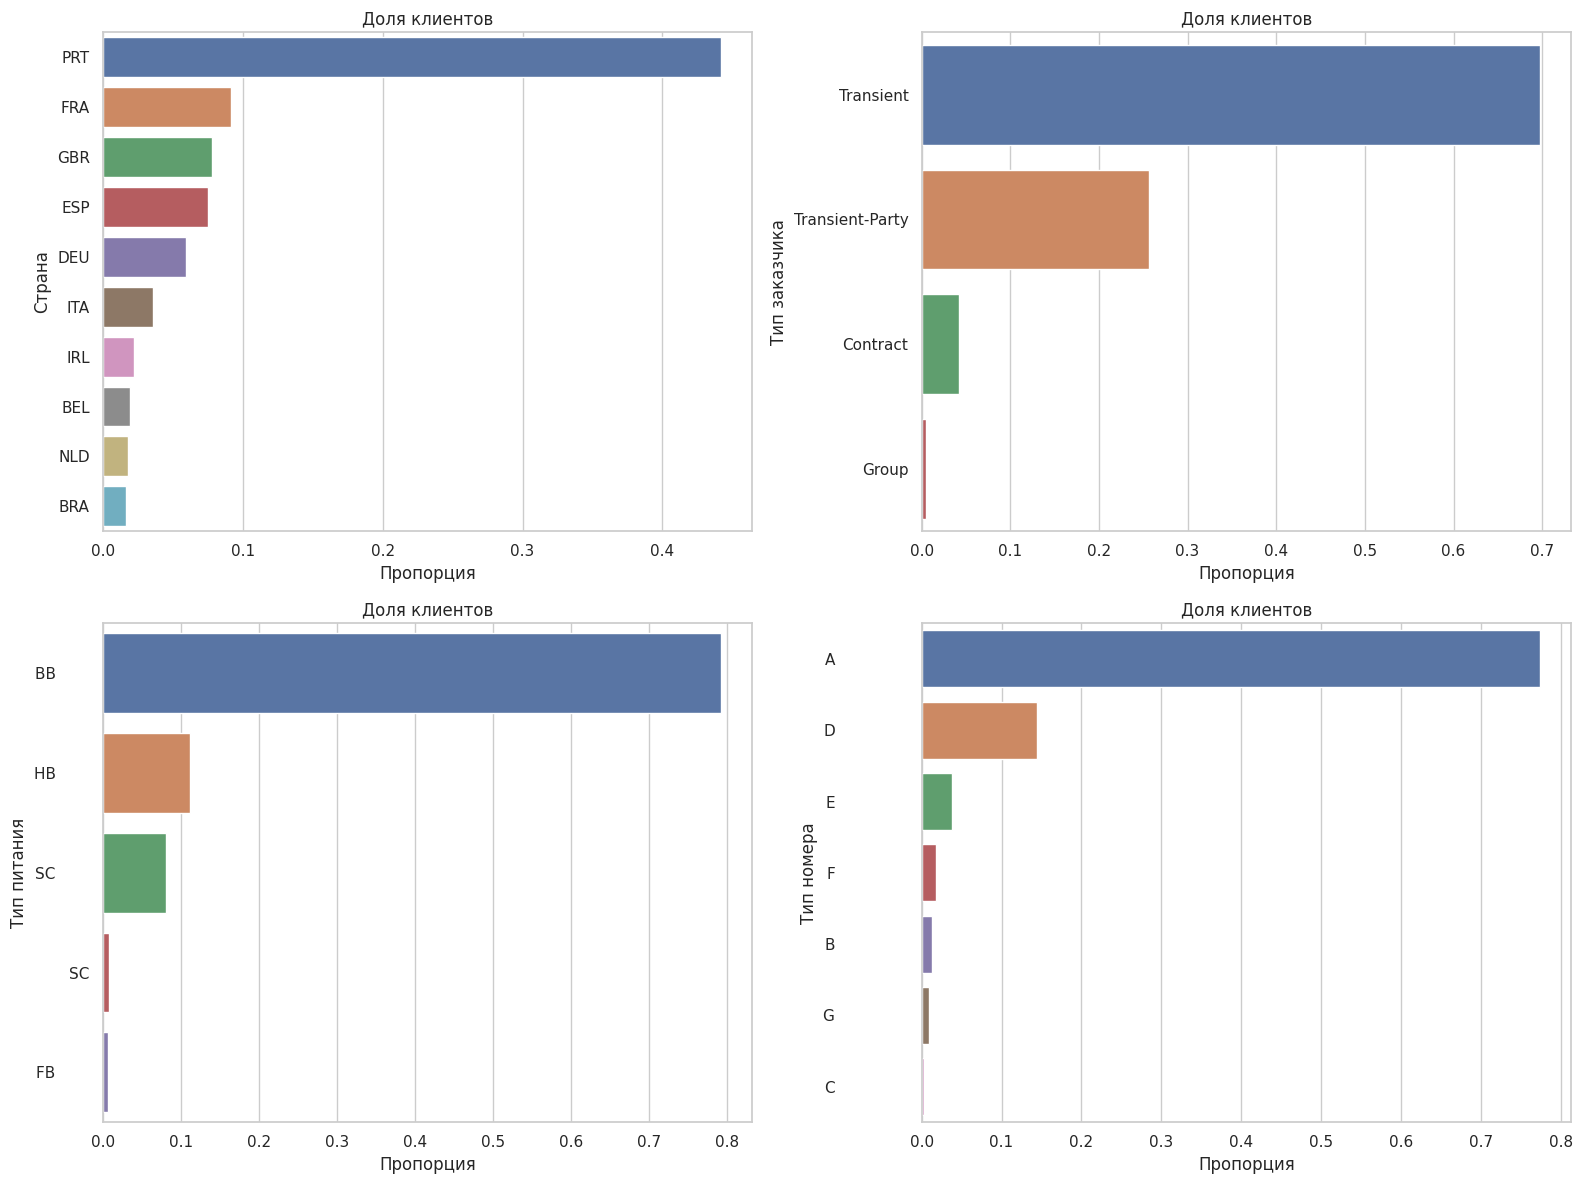

In [16]:
# Визуализируем долю клиентов по различным категориальным признакам
# Список категориальных признаков для анализа
categorical_features = ['country', 'customer_type', 'meal', 'reserved_room_type']

plot_categorical_features(df_train, categorical_features)

#### Вывод:

- Тип заказчика (customer_type): Клиенты типа "Transient" чаще всего отменяют бронирование.

- Тип питания (meal): Вариант "BB" (включенный завтрак) доминирует в обоих категориях (отмененные и не отмененные бронирования);

- Тип номера (reserved_room_type): Отмены чаще всего происходят в самых популярных категориях номеров ("A");

- Повторное бронирование (is_repeated_guest): Повторные гости реже отменяют бронирование, что логично, поскольку они уже знакомы с условиями отеля.

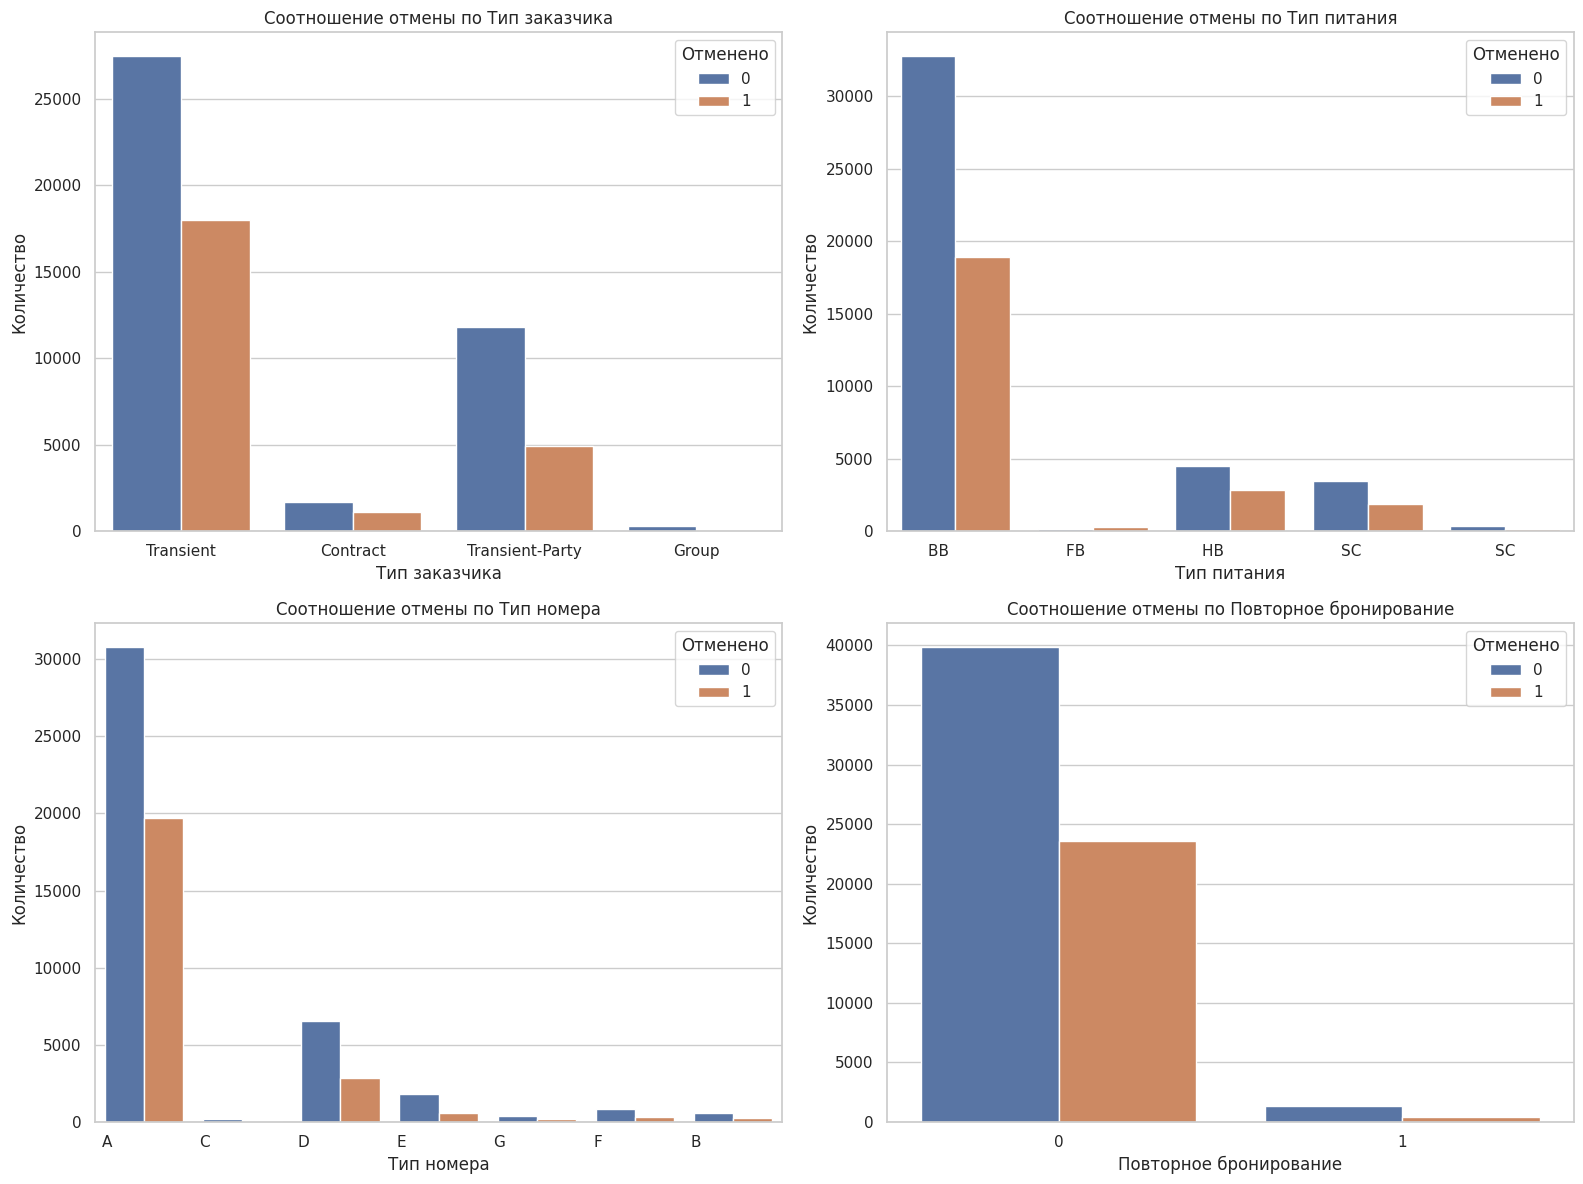

In [17]:
# Список признаков для визуализации соотношения ушедших/неушедших клиентов
features_to_visualize = ['customer_type', 'meal', 'reserved_room_type', 'is_repeated_guest']

plot_cancellation_ratio(df_train, features_to_visualize)

#### Вывод:

- Тип заказчика (customer_type): Большинство клиентов относятся к типу "Transient", что означает бронирование, не связанное с договором или групповым заездом;

- Тип питания (meal): В большинстве случаев клиенты выбирают опцию "BB", которая включает завтрак;

- Тип номера (reserved_room_type): Самыми популярными являются номера категории "A".

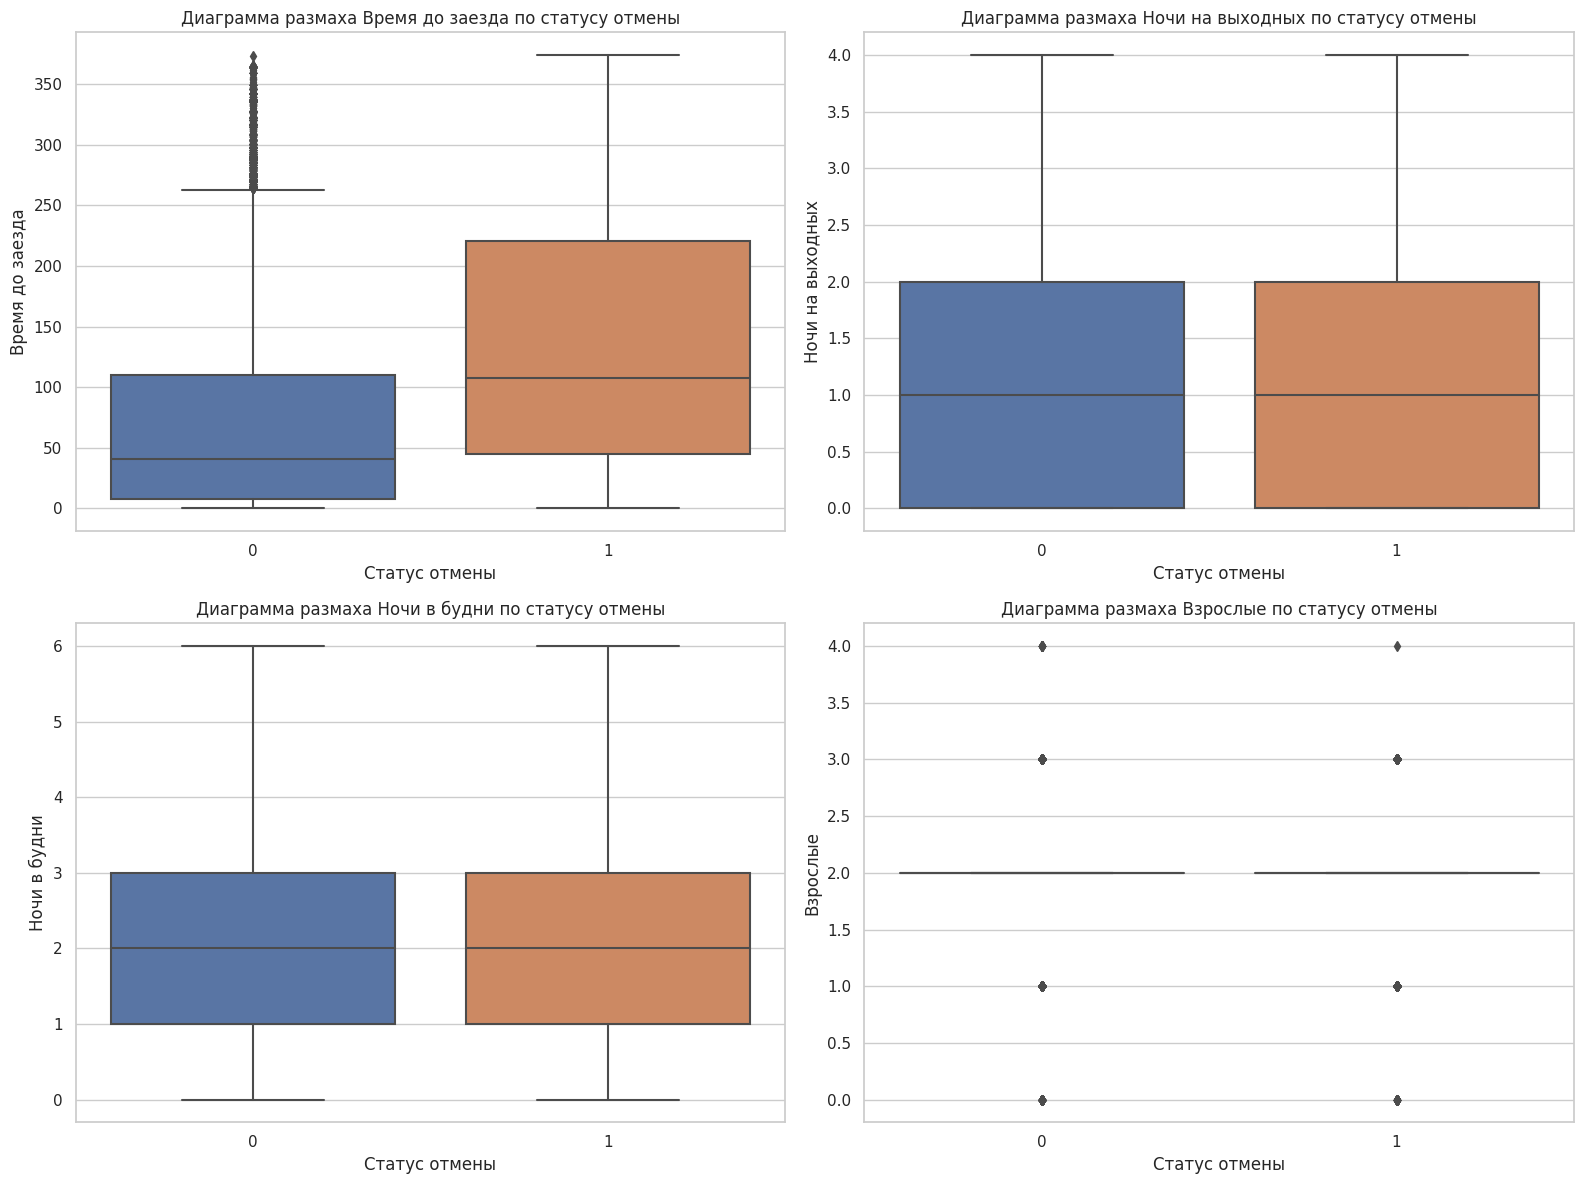

In [18]:
# Визуализируем диаграмму размаха по численным признакам и статусу отмены бронирования.
# Список численных признаков для анализа
numerical_features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults']

plot_boxplots_by_cancellation(df_train, numerical_features)

#### Вывод:

- Время между бронированием и прибытием (lead_time): Отмены чаще происходят, когда время между бронированием и прибытием больше. Это может быть связано с тем, что клиенты имеют больше времени для пересмотра своего решения;

- Количество ночей в выходные (stays_in_weekend_nights): Распределение практически одинаково для отмененных и не отмененных бронирований;

- Количество ночей в будние дни (stays_in_week_nights): Аналогично предыдущему пункту, различия не существенны;

- Количество взрослых (adults): Распределение также схоже для обеих категорий. Однако, стоит отметить наличие выбросов, особенно для не отмененных бронирований.

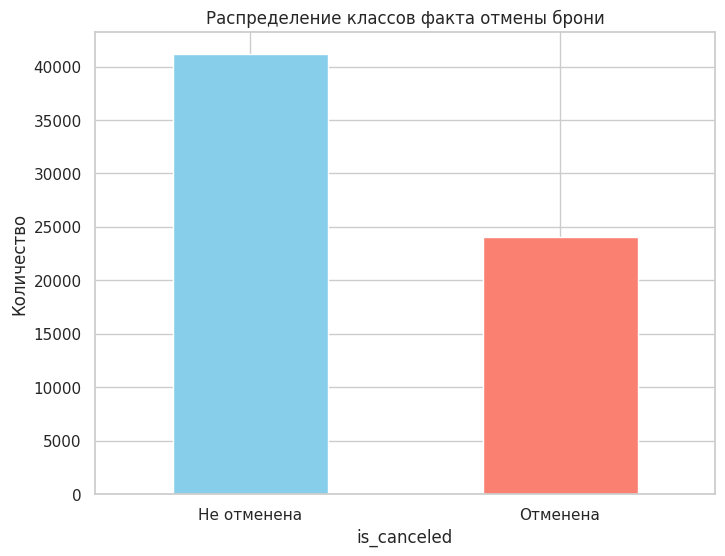

In [19]:
# Подсчет количества каждого класса
class_counts = df_train['is_canceled'].value_counts()

# Визуализация баланса классов с русскими титулом и лейблами
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение классов факта отмены брони')
plt.xlabel('is_canceled')
plt.ylabel('Количество')
plt.xticks(ticks=[0, 1], labels=['Не отменена', 'Отменена'], rotation=0)
plt.show()

<a id="1.4"></a>

#### Вывод:

На основе EDA и описательной статистики можно сделать следующие выводы:

- Данные чистые;

- выбросов и аномалий не наблюдается;

- таргетное значение не сбалансировано.

#### Описательный портрет типичного потребителя сети отелей:

Общие характеристики:

- Тип заказчика: Большинство клиентов относятся к типу "Transient", что указывает на отсутствие долгосрочных договоров или групповых бронирований;

- Тип питания: Доминирующим является вариант "BB", который включает в себя завтрак;

- Тип номера: Наиболее популярными являются номера категории "A".

Особенности в отношении отмены бронирований:

- Тип заказчика: Клиенты типа "Transient" чаще других отменяют бронирование;

- Повторное бронирование: Повторные гости реже отменяют бронь, вероятно, из-за знакомства с условиями отеля.

Характеристики, связанные с численными признаками:

- Время между бронированием и прибытием (Lead Time): Отмены чаще происходят, когда это время больше. Это может быть связано с возможностью пересмотра решения;

- Количество ночей в выходные и будни: Распределение практически одинаково для отмененных и не отмененных бронирований, что делает этот признак менее информативным для прогноза отмены;

- Количество взрослых: Распределение схоже для отмененных и не отмененных бронирований, но имеются выбросы, особенно для неотмененных бронирований.

[Вернуться к задачам исследования](#Задачи_исследования)

<a id="Этап_2"></a>
<a id="2.1"></a>

### Этап 2. Вычислим бизнес-метрику

- Оценим прибыль отеля без внедрения депозитов

[Вернуться к задачам исследования](#Задачи_исследования)

In [20]:
df_for_profit, total_profit = calculate_profit(df_test)
print('Прибыль без депозита составляет:', total_profit, 'руб.')

Прибыль без депозита составляет: 32582920.0 руб.


<a id="Этап_3"></a>
<a id="3.1 "></a>

### Этап 3. Подготовим данные к обучению

#### Проведем кодирование категориальных переменных для моделирования

[Вернуться к задачам исследования](#Задачи_исследования)

In [21]:
# Удалим атрибут 'country', что бы избежать высокого шума после кодирования категориальных переменных
df_train = df_train.drop('country', axis = 1)

In [22]:
# Вывод уникальных значений для каждого категориального столбца
categorical_columns = ['arrival_date_month', 'meal', 'distribution_channel', 'reserved_room_type', 'customer_type']

for col in categorical_columns:
    unique_values = df_train[col].unique()
    print(f'Уникальные значения для столбца "{col}":')
    for val in unique_values:
        print(f'  - {val}')
    print()

Уникальные значения для столбца "arrival_date_month":
  - July
  - August
  - September
  - October
  - November
  - December
  - January
  - February
  - March
  - April
  - May
  - June

Уникальные значения для столбца "meal":
  - BB       
  - FB       
  - HB       
  - SC       
  - SC

Уникальные значения для столбца "distribution_channel":
  - Direct
  - TA/TO
  - Corporate
  - GDS

Уникальные значения для столбца "reserved_room_type":
  - A               
  - C               
  - D               
  - E               
  - G               
  - F               
  - B               

Уникальные значения для столбца "customer_type":
  - Transient
  - Contract
  - Transient-Party
  - Group



In [23]:
# Удаление пробелов с обеих сторон строк в столбце 'meal'
df_train['meal'] = df_train['meal'].str.strip()

#### One-Hot Encoding

Метод one-hot encoding подходит для переменных, у которых нет очевидного порядка между категориями. Применим его к следующим столбцам:

- meal;
- country;
- distribution_channel;
- reserved_room_type;
- customer_type;

#### Label Encoding

Метод label encoding подходит для переменных с упорядоченными категориями. В нашем случае все переменные являются номинативными (кроме arrival_date_month, который имеет порядок). Мы можем применить label encoding к переменной arrival_date_month, сохраняя порядок месяцев.

In [24]:
df_train, label_encoder, onehot_encoder = preprocess_data(df_train, fit_encoders=True)

In [25]:
df_train.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,distribution_channel_TA/TO,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,0,7.00,2015,5,27,1,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,1,0,14.00,2015,5,27,1,2.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
2,2,0,0.00,2015,5,27,1,2.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
3,3,0,9.00,2015,5,27,1,2.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,4,1,85.00,2015,5,27,1,2.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   65229 non-null  int64  
 1   is_canceled                          65229 non-null  int64  
 2   lead_time                            65229 non-null  float64
 3   arrival_date_year                    65229 non-null  int64  
 4   arrival_date_month                   65229 non-null  int64  
 5   arrival_date_week_number             65229 non-null  int64  
 6   arrival_date_day_of_month            65229 non-null  int64  
 7   adults                               65229 non-null  float64
 8   children                             65229 non-null  float64
 9   babies                               65229 non-null  float64
 10  is_repeated_guest                    65229 non-null  int64  
 11  previous_cancellations      

<a id="3.2"></a>

#### Исследуем мультиколлинеарность

[Вернуться к задачам исследования](#Задачи_исследования)

In [27]:
calculate_vif(df_train)

Коэффициент VIF равен
                                Feature  VIF
0                             lead_time 1.33
1                     arrival_date_year 1.47
2                    arrival_date_month 1.15
3              arrival_date_week_number 1.36
4             arrival_date_day_of_month 1.01
5                                adults 1.23
6                              children 1.56
7                                babies 1.02
8                     is_repeated_guest 1.30
9                previous_cancellations 1.10
10       previous_bookings_not_canceled 1.26
11                      booking_changes 1.05
12                 days_in_waiting_list 1.07
13          required_car_parking_spaces 1.06
14            total_of_special_requests 1.19
15                         total_nights 1.12
16                              meal_FB 1.03
17                              meal_HB 1.10
18                              meal_SC 1.12
19          distribution_channel_Direct 2.85
20             distribution_chann

#### Вывод

На основе анализа VIF можно сделать следующие выводы:

- У данные отсутствует линейная зависимость;

- customer_type_Transient и customer_type_Transient-Party значение VIF чуть больше 5 является в пределах верхней границы нормы.

<a id="3.3"></a>

#### Разделим исходные данные на обучающую и тестовую выборку

[Вернуться к задачам исследования](#Задачи_исследования)

Мы будем исполльзовать GridSearchCV, следовательно внутри будет происходить  кросс-валидация, которая включает разделение данных на обучающую и валидационную выборки. Это позволяет оценить производительность модели на различных подмножествах данных и выбрать оптимальные гиперпараметры. Нам достаточно разделить выборку на обучающую и тестоваю.

- X_train, y_train - обучающая выборка;

- X_val, y_val - валидационная выборка;

- X_test, y_test - тестовая выборка.

In [28]:
# X используем для обозначения признаков (features)
# y используем для обозначения целевой переменной (target)
X_features = df_train.drop(['id', 'is_canceled'], axis = 1)
y_target = df_train['is_canceled']

# Разделение данных на обучающую (60%) и временную (40%) выборки
X_train, X_temp, y_train, y_temp = train_test_split(X_features, y_target, test_size=0.4, random_state=0, stratify=y_target)

# Затем разделите временную выборку на валидационную (50%) и тестовую (50%) выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

<a id="Этап_4"></a>

### Этап 4. Исследуем качество разных моделей, меняя гиперпараметры

[Вернуться к задачам исследования](#Задачи_исследования)

#### Для оценки модели мы будем использовать две метрики: F1 и accuracy:

- Сложность бизнес-задачи: Иногда бизнес-задачи настолько сложны, что одна метрика не может полностью охватить все аспекты проблемы. В таком случае, использование разных метрик на разных этапах может дать более полное представление о работе модели;

- Баланс классов: F1-мера является хорошим выбором при несбалансированных классах и акцентирует внимание на минорном классе, что может быть критично для бизнес-задачи (например, минимизация убытков от отмены бронирования). Однако, после подбора гиперпараметров, важно оценить модель с точки зрения более "общей" метрики, как, например, accuracy, чтобы понимать, как модель работает в целом;

- Разные этапы моделирования: На этапе подбора гиперпараметров часто используют более "чувствительные" метрики, чтобы тонко настроить модель. На финальной стадии же может быть важнее использовать метрику, которая лучше интерпретируется бизнесом и конечными пользователями;

- Интерпретируемость и коммуникация: Accuracy может быть более понятной метрикой для непрофессионалов или стейкхолдеров, которым необходимо донести результаты анализа.

#### Логистическая регрессия (Logistic Regression)

##### Маштабирование данных + Pipeline

Поскольку мы используем GridSearchCV с кросс-валидацией для подбора оптимальных гиперпараметров, то воспользуемся практиками, которые помогут избежать утечки данных и обеспечить корректную оценку производительности нашей модели:

- Обработка данных внутри кросс-валидации: При использовании GridSearchCV что бы избежать утечки данных важно убедиться, что все преобразования данных, включая масштабирование, происходят внутри каждой итерации кросс-валидации. В нашем случае, преобразования данных, такие как масштабирование, будут выполняться внутри каждой итерации;

- Pipeline: Будем использовать Pipeline из scikit-learn для определения последовательности операций предобработки данных и обучения модели. Это поможет убедиться, что масштабирование и другие операции применяются корректно.

In [29]:
def Logistic_Regression(X_train, y_train, sampling=None):
    # Определение модели логистической регрессии
    model = LogisticRegression(random_state = random_state)

    """Определение сетки гиперпараметров, которые будут исследоваться при подборе оптимальных значений."""

    # Определение сетки гиперпараметров, которую нужно исследовать
    param_grid = {
        'model__penalty': ['l1', 'l2'],              # тип регуляризации (L1 или L2)
        'model__C': [0.01, 0.1, 1, 10, 100],         # обратная сила регуляризации
        'model__solver': ['liblinear', 'lbfgs'],     # алгоритм оптимизации (изменил lbfgs на liblinear)
        'model__max_iter': [100, 200, 300],          # максимальное количество итераций
    }

    # Создание пайплайна с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', SMOTE(random_state=0)),         # Апсемплинг только на обучающих данных
            ('model', model)                             # Модель логистической регрессии
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', ADASYN(random_state=0)),        # Апсемплинг только на обучающих данных
            ('model', model)                             # Модель логистической регрессии
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('model', model)                             # Модель логистической регрессии
        ])

    # Создание экземпляра GridSearchCV с 10 фолдами кросс-валидации и оптимизацией по accuracy
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search.fit(X_train, y_train)

    # Получение лучшей модели с оптимальными гиперпараметрами
    best_model = grid_search.best_estimator_

    # Лучшая оценка (F1-мера) на валидационных данных
    best_f1 = grid_search.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_model

In [30]:
best_model = Logistic_Regression(X_train, y_train, 'SMOTE')

Лучшая оценка на валидационных данных (F1-мера): 0.6770003577696577


#### Решающие деревья (Decision Trees)

In [31]:
def Decision_Tree_Classifier(X_train, y_train, sampling=None):
    # Определение модели Решающих деревьев
    tree_model = DecisionTreeClassifier(random_state = random_state)

    """
    criterion : критерий для разбиения (индекс Джини или энтропия)
    'gini': Индекс Джини измеряет неопределенность (чистоту) в узле. Чем меньше значение индекса Джини, тем "чище" узел.
    'entropy': Энтропия измеряет степень хаоса или неопределенности в узле. Чем меньше значение энтропии, тем "чище" узел.
    """

    # Определение сетки гиперпараметров для Решающих деревьев
    param_grid_tree = {
        'model__criterion': ['gini', 'entropy'],           # критерий для разбиения (индекс Джини или энтропия)
        'model__splitter': ['best', 'random'],             # стратегия выбора разбиения
        'model__max_depth': [None, 10, 20, 30, 50],        # максимальная глубина дерева
        'model__min_samples_split': [2, 5, 10],            # минимальное число примеров для разбиения узла
        'model__min_samples_leaf': [1, 2, 4],              # минимальное число примеров в листе
    }

     # Создание пайплайна с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', SMOTE(random_state=0)),         # Апсемплинг только на обучающих данных
            ('model', tree_model)                        # Модель логистической регрессии
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', ADASYN(random_state=0)),        # Апсемплинг только на обучающих данных
            ('model', tree_model)                        # Модель логистической регрессии
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('model', tree_model)                        # Модель логистической регрессии
        ])

    # Создание экземпляра GridSearchCV для Решающих деревьев
    grid_search_tree = GridSearchCV(pipeline, param_grid_tree, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_tree.fit(X_train, y_train)

    # Получение лучшей модели Решающих деревьев с оптимальными гиперпараметрами
    best_tree_model = grid_search_tree.best_estimator_

    # Лучшая оценка (F1-мера) на валидационных данных
    best_f1 = grid_search_tree.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_tree_model

In [32]:
best_tree_model = Decision_Tree_Classifier(X_train, y_train, 'SMOTE')

Лучшая оценка на валидационных данных (F1-мера): 0.7511997112779696


#### Случайный лес (Random Forest)

In [33]:
def Random_Forest_Classifier(X_train, y_train, sampling=None):
    # Определение модели Случайного леса
    rf_model = RandomForestClassifier(random_state = random_state)

    """
    n_estimators: Количество деревьев в лесу.
    Большее значение может улучшить точность, но увеличит время обучения.
    """

    # Определение сетки гиперпараметров для Случайного леса
    param_grid_rf = {
        'model__n_estimators': [10, 25, 50],            # количество деревьев в лесу
        'model__criterion': ['gini', 'entropy'],        # критерий для разбиения (индекс Джини или энтропия)
        'model__max_depth': [None, 10, 20, 30, 50],     # максимальная глубина дерева
        'model__min_samples_split': [2, 5, 10],         # минимальное число примеров для разбиения узла
        'model__min_samples_leaf': [1, 2, 4],           # минимальное число примеров в листе
    }

    # Создание пайплайна с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', SMOTE(random_state=0)),         # Апсемплинг только на обучающих данных
            ('model', rf_model)                          # Модель логистической регрессии
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', ADASYN(random_state=0)),        # Апсемплинг только на обучающих данных
            ('model', rf_model)                          # Модель логистической регрессии
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('model', rf_model)                          # Модель логистической регрессии
        ])

    # Создание экземпляра GridSearchCV для Случайного леса
    grid_search_rf = GridSearchCV(pipeline, param_grid_rf, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_rf.fit(X_train, y_train)

    # Получение лучшей модели Случайного леса с оптимальными гиперпараметрами
    best_rf_model = grid_search_rf.best_estimator_

    # Лучшая оценка (F1-мера) на валидационных данных
    best_f1 = grid_search_rf.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_rf_model

In [34]:
best_rf_model = Random_Forest_Classifier(X_train, y_train, 'SMOTE')

Лучшая оценка на валидационных данных (F1-мера): 0.7938507381865406


#### Градиентный бустинг (Gradient Boosting)

In [35]:
def Gradient_Boosting_Classifier(X_train, y_train, sampling=None):
    # Создание экземпляра модели градиентного бустинга
    model_gb = GradientBoostingClassifier(random_state = random_state)

    # Определение сетки гиперпараметров, которую нужно исследовать для градиентного бустинга
    param_grid_gb = {
        'model__learning_rate': [0.01, 0.1, 0.5],        # Скорость обучения (шаг градиентного спуска)
        'model__n_estimators': [50, 100, 200],           # Количество базовых моделей (деревьев)
        'model__max_depth': [3, 5, 7],                   # Максимальная глубина деревьев
    }

    # Создание пайплайна с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', SMOTE(random_state=0)),         # Апсемплинг только на обучающих данных
            ('model', model_gb)                          # Модель логистической регрессии
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('sampling', ADASYN(random_state=0)),        # Апсемплинг только на обучающих данных
            ('model', model_gb)                          # Модель логистической регрессии
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),                # Масштабирование данных
            ('model', model_gb)                          # Модель логистической регрессии
        ])

    # Создание экземпляра GridSearchCV с 10 фолдами кросс-валидации и оптимизацией по accuracy
    grid_search_gb = GridSearchCV(pipeline, param_grid_gb, cv=10, scoring='f1', refit=True, n_jobs=-1)

    # Обучение на обучающей выборке с перебором всех комбинаций гиперпараметров
    grid_search_gb.fit(X_train, y_train)

    # Получение лучшей модели с оптимальными гиперпараметрами
    best_model_gb = grid_search_gb.best_estimator_

    # Лучшая оценка (метрика accuracy) на валидационных данных
    best_f1 = grid_search_gb.best_score_
    print("Лучшая оценка на валидационных данных (F1-мера):", best_f1)

    return best_model_gb

In [36]:
best_model_gb= Gradient_Boosting_Classifier(X_train, y_train, 'SMOTE')

Лучшая оценка на валидационных данных (F1-мера): 0.7768443304208648


### Последовательная модель (Sequential)

Модель Sequential в контексте нейронных сетей (часто используется в библиотеке Keras) представляет собой линейный стек слоёв. Давайте рассмотрим основные аспекты и математические основы, на которых строится такая модель.

1. Слой полносвязной нейронной сети (Dense Layer).

В основном, модель Sequential строится на использовании полносвязных слоев. Формула для одного нейрона в полносвязном слое выглядит следующим образом:

- $[ y = \phi \left( \sum_{i=1}^{n} w_i x_i + b \right) ]$

где:
- $y$ — выход нейрона;
- $ϕ$ — функция активации;
- $w_i$ — вес $i$-го входа;
- $x_i$ — i-й вход;
- $b$ — смещение (bias);
- $n$ — количество входов.

2. Функции активации

Различные функции активации имеют разные математические выражения. Например:

- ReLU (Rectified Linear Unit): $ (\phi(x) = \max(0, x)) $
- Сигмоида: $ (\phi(x) = \frac{1}{1 + e^{-x}}) $
- Гиперболический тангенс: $ (\phi(x) = \tanh(x)) $

3. Пакетная нормализация (Batch Normalization)

Пакетная нормализация часто используется для ускорения обучения. Она нормализует выход каждого нейрона на основе статистик текущего мини-пакета (mini-batch). Математически это можно описать следующим образом:

- $ \text{BN}(x) = \gamma \left( \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \right) + \beta $

где:

- $ \gamma, \beta $ - параметры масштаба и смещения, которые обучаются во время обучения;

- $ \mu, \sigma^2 $ - среднее и дисперсия мини-пакета;

- $ \epsilon $ - маленькое число, предотвращающее деление на ноль.

4. Оптимизаторы

Оптимизаторы используются для минимизации функции потерь $L$ по параметрам модели. Некоторые популярные оптимизаторы включают:

- SGD (Stochastic Gradient Descent):

  - $\theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla_\theta L$
  
- Adam:
  - $m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t$

  - $v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2$
  
  - $\hat{m}_t = \frac{m_t}{1-\beta_1^t}$
  
  - $\hat{v}_t = \frac{v_t}{1-\beta_2^t}$
  
  - $\theta_{\text{new}} = \theta_{\text{old}} - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$

  где:

  - $θ$ — параметры модели;

  - $η$ — скорость обучения (learning rate);

  - $∇_θL$ — градиент функции потерь по параметрам;

  - $g_t$ — градиент на текущем шаге;

  - $β_1$, $β_2$, $ϵ$ — гиперпараметры алгоритма Adam;
  
  - $m_t$, $v_t$ — моменты первого и второго порядка.

5. Функции потерь

Функции потерь используются для оценки ошибки модели. Некоторые распространенные функции потерь:

MSE (Mean Squared Error) для задач регрессии:

  - $ L(y, \hat{y}) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $

Crossentropy для задач классификации:

 - $ L(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij}) $

 где:

 - $y$ и $\hat{y}$ — истинные и предсказанные значения;

 - $N$ — количество примеров в пакете;

 - $C$ — количество классов.

### Структура и гиперпараметры

В модели Sequential мы строим архитектуру нейронной сети, добавляя слои один за другим. Рассмотрим основные аспекты и гиперпараметры:

Слои (Layers)

- Dense layer: Полносвязный слой, где каждый узел соединен со всеми узлами в предыдущем слое;

- Convolutional layer: Слой, применяющий свёртку для обработки данных (чаще всего изображений);

- Recurrent layer: Слой, использующий рекуррентные соединения, подходит для работы с последовательностями данных.

Гиперпараметры для слоев:

- Units/neurons: Количество нейронов в слое (только для Dense);

- Activation function: Функция активации (например, relu, softmax);

- Kernel initializer: Метод инициализации весов;

- Bias initializer: Метод инициализации смещений.

Оптимизатор (Optimizer)

- Learning rate: Скорость обучения — шаг обновления весов;

- Momentum: Момент — параметр, учитывающий предыдущие градиенты для более стабильного обучения.

Функция потерь (Loss function)

- Часто используемые функции потерь: Mean Squared Error (для регрессии), Crossentropy (для классификации).

Метрики (Metrics)

- Например, accuracy для классификации.

Процесс обучения

- В процессе обучения модель Sequential использует метод обратного распространения ошибки (backpropagation) для оптимизации весов.

Математически это можно описать следующим образом:

Forward Pass

- Данные проходят через сеть, и на выходе получается предсказание. Вычисляется функция потерь, сравнивая предсказание с истинным значением.

Backward Pass

- Вычисляется градиент функции потерь по отношению к каждому весу (используя правило цепи). Веса обновляются в направлении, уменьшающем функцию потерь.

Математически обновление весов можно описать как:

- $W_{new} = W_{old}−learning rate⋅gradient$

In [37]:
class TimingCallback(Callback):
    """
    Кастомный callback для замера времени обучения на каждой эпохе.

    Этот callback сохраняет продолжительность каждой эпохи в список и логирует время и значение F1 score
    в конце каждой эпохи.

    Attributes:
        times (list): Список для хранения времени обучения на каждой эпохе.
    """

    def __init__(self):
        """Инициализатор класса TimingCallback, создающий список times для хранения продолжительности каждой эпохи."""
        super().__init__()
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        """
        Метод вызывается в начале каждой эпохи.

        Args:
            epoch (int): Текущая эпоха.
            logs (dict, optional): Словарь для хранения метрик. По умолчанию None.
        """
        self.start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        """
        Метод вызывается в конце каждой эпохи.

        Args:
            epoch (int): Текущая эпоха.
            logs (dict, optional): Словарь с текущими результатами обучения. По умолчанию None.
        """
        elapsed_time = time.time() - self.start_time
        self.times.append(elapsed_time)

        logging.info("Epoch %d: Time taken: %f seconds", epoch, elapsed_time)
        logging.info("Epoch %d: F1 score: %f", epoch, logs.get("f1_score", "Not available"))
        logging.info("-"*50)

In [38]:
def grid_search(X_train, y_train, layers=[[12]], dropout_rate=0.0, optimizer='adam', sampling=None):
    """
    Функция для выполнения решетчатого поиска с целью найти оптимальные гиперпараметры для нейронной сети.

    Параметры:
    X_train (array-like, shape (n_samples, n_features)): Массив обучающих данных.
    y_train (array-like, shape (n_samples,)): Массив целевых переменных для обучающих данных.
    layers (list of list of int, optional): Список структур слоев для проверки во время решетчатого поиска. Значение по умолчанию — [[12]].
    dropout_rate (float, optional): Степень dropout, применяемая к слою нейронной сети. Значение по умолчанию — 0.0 (без dropout).
    optimizer (str, optional): Оптимизатор для компиляции модели. Значение по умолчанию — 'adam'.

    Возвращает:
    grid_result (sklearn.model_selection._search.GridSearchCV): Результат решетчатого поиска, содержащий информацию о лучших гиперпараметрах и эффективности различных комбинаций параметров.
    """

    # Шаг 1: создание функции для создания модели
    def create_model(layers=[12], dropout_rate=0.0, optimizer='adam', callbacks=[]):
        """
        Создает и компилирует простую нейронную сеть с заданной степенью dropout и структурой слоев.

        Параметры:
        layers (list of int): список, определяющий количество нейронов на каждом слое.
        dropout_rate (float): степень dropout, применяемая к слою нейронной сети. Значение по умолчанию — 0.0 (без dropout).
        optimizer (str): Оптимизатор для компиляции модели. Значение по умолчанию — 'adam'.

        Возвращает:
        model (keras.engine.sequential.Sequential): скомпилированная модель нейронной сети.
        """

        # Инициализация модели последовательного типа. В такой модели слои соединяются последовательно, каждый слой передает свой выход следующему слою.
        model = Sequential()

        # Добавление первого полносвязного слоя (Dense) с relu-активацией.
        # - layers[0]: количество нейронов в первом слое
        # - input_dim: размер входного вектора, равный числу признаков в X_train
        # - activation: функция активации нейронов в слое (в данном случае 'relu')
        model.add(Dense(layers[0], input_dim=X_train.shape[1], activation='relu'))

        # Цикл для добавления оставшихся слоев с relu-активацией и слоев dropout для борьбы с переобучением
        for i in layers[1:]:
            # Добавление полносвязного слоя с i нейронами и relu-активацией
            model.add(Dense(i, activation='relu'))

            # Добавление dropout-слоя с заданной степенью "отключения" нейронов (dropout_rate)
            # Dropout помогает предотвратить переобучение, случайно обнуляя часть выходов нейронов на каждом шаге обучения
            model.add(Dropout(dropout_rate))

        # Добавление выходного слоя с одним нейроном и сигмоидной активацией, что хорошо подходит для бинарной классификации
        model.add(Dense(1, activation='sigmoid'))

        # Компиляция модели с бинарной кроссэнтропийной функцией потерь и оптимизатором Adam для минимизации функции потерь
        # - loss: функция потерь, которую необходимо минимизировать (в данном случае бинарная кроссэнтропия)
        # - optimizer: оптимизатор, используемый для минимизации функции потерь (в данном случае 'adam')
        # - metrics: список метрик, используемых для оценки производительности модели (в данном случае 'accuracy' - точность)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[tfa.metrics.F1Score(num_classes=2, average='micro')])

        # Возвращение скомпилированной модели
        return model

    sampling = sampling
    timing_callback = TimingCallback()

    # Шаг 2: создание объекта KerasClassifier с использованием partial
    model = KerasClassifier(build_fn=create_model, layers=layers, dropout_rate=dropout_rate, optimizer=optimizer, callbacks=[timing_callback], verbose=0)
    timing_callback = TimingCallback()

    # Шаг 3: определение сетки для поиска оптимальных параметров
    param_grid = {
    # 'batch_size': размер батча, указывает количество обучающих образцов, используемых в одной итерации обучения.
    # Меньший размер батча может привести к более точному обновлению градиентов, но обучение будет медленнее.
    'model__batch_size': [8],

    # 'epochs': количество эпох, т.е. сколько раз алгоритм обучения будет проходить через весь набор данных.
    # Большее количество эпох может улучшить производительность модели до определенного момента.
    'model__epochs': [5],

    # 'dropout_rate': вероятность отключения нейрона во время обучения; используется для предотвращения переобучения.
    # Указывает долю нейронов, которые следует случайным образом исключить на каждой эпохе обучения.
    'model__dropout_rate': [0.0],

    # 'optimizer': алгоритм оптимизации, используемый для минимизации функции потерь.
    # - 'adam': адаптивная оценка момента; хорошо подходит для большинства задач
    # - 'sgd': стохастический градиентный спуск; классический оптимизатор
    # - 'rmsprop': корень из среднеквадратичного градиента; часто используется в нейронных сетях.
    'model__optimizer': ['adam', 'sgd', 'rmsprop'],

    # 'layers': структура каждой сети, представленная списком, где каждый элемент списка указывает количество нейронов в соответствующем слое.
    'model__layers': [
        [32, 28, 24, 20, 16, 12, 8, 4, 2], # [32, 16, 8, 4, 2]
    ],
    }

    # Создаем пайплайн с масштабированием и моделью
    if sampling == 'SMOTE':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('sampling', SMOTE(random_state=0)),
            ('model', model)
        ])
    elif sampling == 'ADASYN':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('sampling', ADASYN(random_state=0)),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

    logging.info("Starting grid search with the following parameter grid:")
    logging.info(param_grid)

    # Шаг 4: создание объекта GridSearchCV и запуск поиска
    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, n_jobs=1, cv=5)
    model_Sequential = grid.fit(X_train, y_train)

    logging.info("Grid search completed.")
    logging.info("Best score: %f", model_Sequential.best_score_)
    logging.info("Best parameters: %s", model_Sequential.best_params_)

    # Шаг 5: вывод результатов
    print("Best: %f using %s" % (model_Sequential.best_score_, model_Sequential.best_params_))

    return model_Sequential

In [39]:
model_Sequential = grid_search(X_train, y_train, sampling = 'SMOTE')

Best: 0.814651 using {'model__batch_size': 8, 'model__dropout_rate': 0.0, 'model__epochs': 5, 'model__layers': [32, 28, 24, 20, 16, 12, 8, 4, 2], 'model__optimizer': 'sgd'}


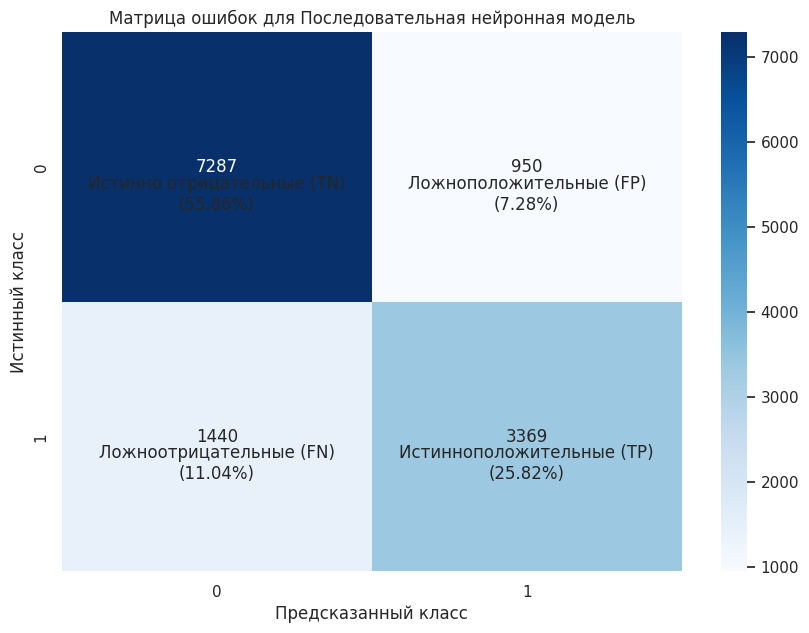

Истинно отрицательные (TN): 7287 (55.86%)
Ложноположительные    (FP): 950 (7.28%)
Ложноотрицательные    (FN): 1440 (11.04%)
Истинноположительные  (TP): 3369 (25.82%)


In [41]:
# Прогнозирование на валидацинной выборке
y_val_pred = model_Sequential.predict(X_val)

# Вызов функции для отображения матрицы ошибок
display_confusion_matrix(y_val, y_val_pred, "Последовательная нейронная модель")

#### Выводы:

- Модель демонстрирует неплохую способность к правильной классификации, как положительных, так и отрицательных классов. Однако есть определенное количество ложноположительных и ложноотрицательных решений.

In [42]:
# Оценка модели на валидационной выборке
test_accuracy = model_Sequential.score(X_val, y_val)
print("Точность на валидацинной выборке:", test_accuracy)

Точность на валидацинной выборке: 0.8168020849302469


#### Выводы:

- Модель правильно классифицирует 81% примеров из валидационного датасета. Это достаточно хороший результат.

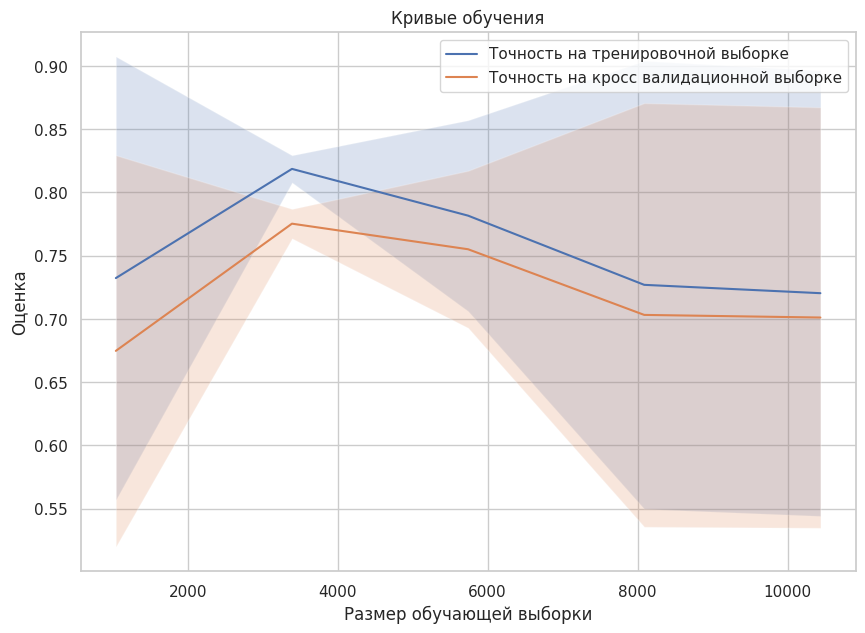

Точность на тренировочной выборке:
Размер выборки: 1043, Точность: 0.73 +/- 0.18
Размер выборки: 3391, Точность: 0.82 +/- 0.01
Размер выборки: 5739, Точность: 0.78 +/- 0.08
Размер выборки: 8087, Точность: 0.73 +/- 0.18
Размер выборки: 10436, Точность: 0.72 +/- 0.18

Точность на кросс-валидационной выборке:
Размер выборки: 1043, Точность: 0.67 +/- 0.15
Размер выборки: 3391, Точность: 0.78 +/- 0.01
Размер выборки: 5739, Точность: 0.76 +/- 0.06
Размер выборки: 8087, Точность: 0.70 +/- 0.17
Размер выборки: 10436, Точность: 0.70 +/- 0.17


In [43]:
# Отображение кривых обучения
display_learning_curves(model_Sequential, X_test, y_test, cv=5)

#### Выводы:

- Стабильность модели: Модель демонстрирует стабильные результаты (за исключением случая с выборкой размером 8087, где заметно большое стандартное отклонение);

- Переобучение: Нет явных признаков переобучения, так как точность на тренировочной и валидационной выборках варьируется в схожих диапазонах.

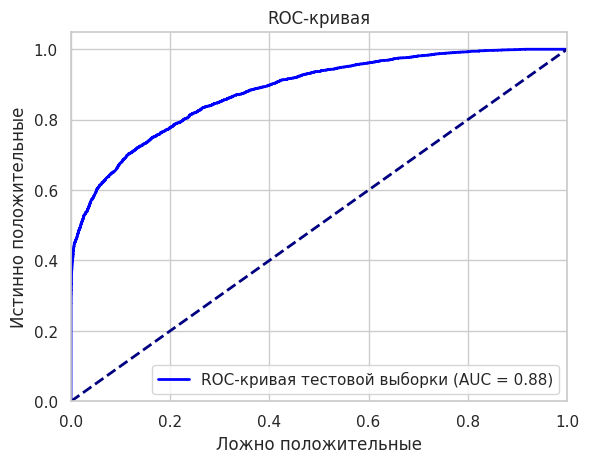

AUC для тестовой выборки: 0.8824931618114259


In [44]:
# Отображение ROC-кривой
display_roc_curves(model_Sequential, X_val, y_val)

#### Выводы:

- Высокое качество модели: Значение AUC близко к 1, что говорит о том, что модель имеет высокую предсказательную способность;

- Хорошее разделение классов: Значение 0.88 показывает, что модель достаточно хорошо разделяет положительные и отрицательные классы.

#### Общий вывод:

- Тут выбор очевиден: последовательная модель (Sequential)

#### Проверим модель на тестовой выборке

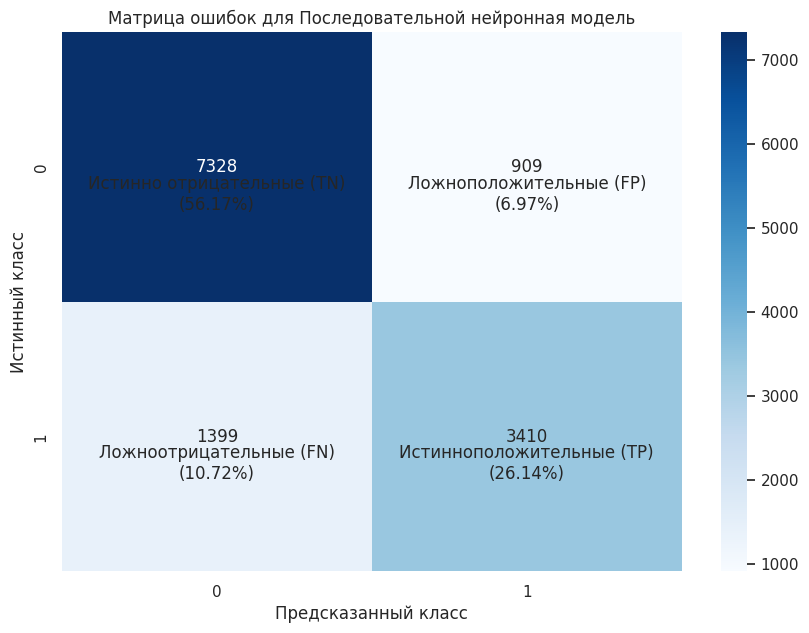

Истинно отрицательные (TN): 7328 (56.17%)
Ложноположительные    (FP): 909 (6.97%)
Ложноотрицательные    (FN): 1399 (10.72%)
Истинноположительные  (TP): 3410 (26.14%)


In [45]:
# Прогнозирование на тестовой выборке
y_test_pred = model_Sequential.predict(X_test)

# Вызов функции для отображения матрицы ошибок
display_confusion_matrix(y_test, y_test_pred, "Последовательной нейронная модель")

In [46]:
# Оценка модели на тестовой выборке
test_accuracy = model_Sequential.score(X_test, y_test)
print("Точность на тестовой выборке:", test_accuracy)

Точность на тестовой выборке: 0.8230875364096275


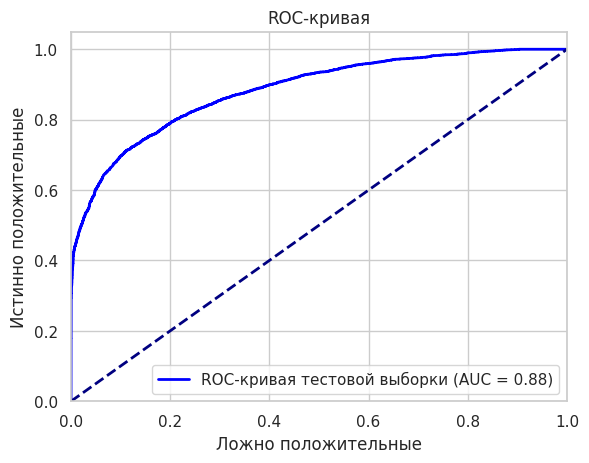

AUC для тестовой выборки: 0.8836461156597213


In [47]:
# Отображение ROC-кривой
display_roc_curves(model_Sequential, X_test, y_test)

#### Оценим прибыль сколько принесет выбранная модель за год

In [48]:
result_df, total_profit = calculate_profit(df_test)
print('Прибыль без депозита составляет:', total_profit, 'руб.')

Прибыль без депозита составляет: 32582920.0 руб.


In [49]:
# Удаление столбца 'country'
df_test = df_test.drop('country', axis=1)

# Удаление пробелов в столбце 'meal'
df_test['meal'] = df_test['meal'].str.strip()

# Применение Label Encoder
df_test['arrival_date_month'] = label_encoder.transform(df_test['arrival_date_month'])

# Применение One-Hot Encoder
onehot_columns = ['meal', 'distribution_channel', 'reserved_room_type', 'customer_type']
onehot_transformed = onehot_encoder.transform(df_test[onehot_columns])

# Преобразование в DataFrame и совмещение с оригинальным df_test
df_onehot = pd.DataFrame(onehot_transformed, columns=onehot_encoder.get_feature_names_out(onehot_columns))
df_test = pd.concat([df_test.drop(onehot_columns, axis=1).reset_index(drop=True), df_onehot.reset_index(drop=True)], axis=1)

df_test = df_test.drop(['id', 'is_canceled', 'stays_in_week_nights', 'stays_in_weekend_nights'], axis=1)

In [50]:
model_predictions = model_Sequential.predict(df_test)

# Создаем DataFrame с предсказаниями модели
predictions_df = pd.DataFrame({'model_prediction': model_predictions})

# Объединяем предсказания с 'df_for_profit' на основе индекса
df_for_profit = pd.concat([df_for_profit, predictions_df], axis=1)

# Определяем функцию 'predicted_profit'
def predicted_profit(data):
    if data['is_canceled'] == 0:
        income = data['price_per_night'] * data['koeff'] * data['total_nights']
        expenses = data['service_price'] * (1 + data['total_nights'] // 2)
    elif (data['is_canceled'] == 1) and (data['model_prediction'] == 0):
        income = 0
        expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
    elif (data['is_canceled'] == 1) and (data['model_prediction'] == 1):
        income = (data['price_per_night'] * data['koeff'] * 0.8) + (data['service_price'] * 0.8)
        expenses = data['service_price'] + (data['price_per_night'] * data['koeff'])
    profit = income - expenses
    return profit

# Применяем функцию 'predicted_profit' для создания новой колонки
df_for_profit['profit'] = df_for_profit.apply(predicted_profit, axis=1)

# Опционально: Переименовываем колонку 'model_prediction' для соответствия имени модели
df_for_profit.rename(columns={'model_prediction': 'prediction_Sequential'}, inplace=True)

In [51]:
print('Прибыль после обучения Sequential:', df_for_profit['profit'].sum())

Прибыль после обучения Sequential: 41158032.0


In [52]:
print('Прибыль от использования Sequential модели:', 40869104 - 32582920)

Прибыль от использования Sequential модели: 8286184


#### Этап 5. Выявим признаки «ненадёжного» клиента

- Чем больше времени между бронированием и выездом, тем выше вероятность отказа. Есть время передумать;

- Чем больше специальных отметок, тем ниже вероятность отказа. Гости, которые оставляют отметки или пожелания, заинтересованы в том, чтобы снять номер;

- Если есть требования к парковочным местам, то вероятность отказа от бронирования ниже. Если человек едет на машине, значит путешествие, скорее всего, запланировано и меньше соблазна отменять бронь;

- Если есть отмены брони, то есть и вероятность отказа. У клиента наблюдается модус поведения;

- Чем больше было неотмененных броней у клиента ранее, тем ниже вероятность отмены;

- Чем выше количество изменений параметров заказа, тем ниже вероятность отмены брони. Опять же, если человек оставляет какие то требования, то значит он, скорее всего, заинтересован в брони;

- Если гость до этого бронировал номер, то ниже вероятность отмены в дальнейшем. значит клиент проверенный.

#### Этап 6. Общий вывод

На основе анализа данных и построенной последовательной модели с высоким показателем recall на тестовой выборке (0,81), рекомендуется использовать данную модель для прогнозирования оттока клиентов. Это позволит снизить потери и увеличить прибыль, окупив затраты на создание модели. Также стоит обратить внимание на фактор времени ожидания между бронированием и заездом, который сильно влияет на вероятность отмены. Долгие взаимоотношения с отелем, предыдущие бронирования и специальные отметки также связаны с более надежными клиентами. Кроме того, следует оценить стратегию работы с клиентами из Португалии, учитывая их высокий уровень отмен. Дальнейший мониторинг данных и постоянное улучшение модели помогут оптимизировать бизнес и увеличить его эффективность.